# Trabajo Final de Procesamiento de Imagenes
## Hito 2
<br>
## Alumnos: 
Gabriel Ramirez Reategui <br>
<br>Carlos Guizado Diaz

En el presente documento se expondran los avances del proyecto de procesamiento de imagenes digitales del curso de UPC <br> <br>
Siguiendo la definicion: <br>
<b>"El trabajo (TF), tiene por objetivo que los estudiantes apliquen los conocimientos adquiridos
en técnicas de Procesamiento Digital de Imágenes, en especial los conceptos de preprocesamiento,
filtros, segmentación y reconocimiento de patrones"</b> <br><br>
El Hito 2 requeria de tener una imagen con una partitura y encuadrar cada nota por separado por separado. Para esto se requiere una serie de pasos a seguir:
<ul>
<li>Cargar la Imagen</li>
<li>Seccionar la Imagen por bloque</li>
<li>Limpiar las Lineas</li>
<li>Seccionar la imagen por nota</li>
</ul>


Para que esto pueda funcionar, en primer lugar usaremos el archivo functions, que incluye las funciones basicas de <b>Leer,cargar,guardar,mostrar y aplicar tresshold</b>:<br>

### functions.py

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def loadimg(link): #Load picture
    img  = cv2.imread(link)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def show(temp): #Used to show the picture
    a = cv2.cvtColor(temp,cv2.COLOR_GRAY2RGB)
    plt.imshow(a)
    plt.show()
    return

def to_grey(image):
    img = np.copy(image)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img

def saveimg(imagen,name):
    cv2.imwrite(name,imagen)
    pass

def tresshold(image,value):
    img = np.copy(image)
    sx,sy = np.size(image,0),np.size(image,1)
    for i in range(0,sx):
        for j in range(0,sy):
            if(image[i][j] > value):
                img[i][j] = 255
            else:
                img[i][j] = 0
    
    return img

Luego utilizamos esta libreria en nuestro archivo principal de la siguiente manera:

In [25]:
import functions as f

Luego llega momento de usar el codigo en cuestion. En primer lugar, necesitamos una imagen definida. Para este proyecto, utilizaremos una imagen llamada test.png.<br>
![title](test.png)

Primero se carga la imagen:

In [5]:
test = f.loadimg("test.png")
test = f.to_grey(test)

En este caso, necesitamos separa cada bloque de partitura en nuestro trabajo. Para esta situacion utilizaremos el metodo de linea vacia, el cual generara bloques de imagenes separadas por los espacios vacios de la imagen. Para esta imagen no es necesario usar <b>f.tresshold()</b> pero existiran situaciones el las cuales si:<br><br>

La funcion mostrada a continuacion solo nos dara las posiciones y los tamaños de estos bloques, para ser separados luego:

In [6]:
def line_separator(img,color): #en caso se bloques blancos se utilizaria el valor 255
    sx,sy = np.size(img,0),np.size(img,1)
    c = 0
    ca =[]
    for i in range(0,sx):
        temp = False
        for j in range(0,sy):
            if(img[i][j] != color):
                temp = True
        if temp == True:
            c = c+1
        elif(c != 0):
            ca.append([c,i-c,i])
            c = 0
    return ca


Luego como se menciono con anterioridad, una vez obtenidas las posiciones, necesitamos seccionar nuestra imagen anterior. Para lo cual se ha creado la siguiente funcion:

In [12]:
def separator_blocks(img,cord): #recibe las cordenadas obtenidas por line_separator()
    images = []
    for i in range(0,np.size(cord,0)):
        #For each one
        csize = cord[i][0] 
        sy = np.size(img,1)
        cstart = cord[i][1]
        temp = np.zeros([csize,sy],dtype=np.uint8)
        for n in range(0,csize):
            for m in range(0,sy):
                temp[n][m] = img[n + cstart][m]
        images.append(temp)
    return images #Retornara una serie de imagenes

Pero existe algo importante en el caso de nuestra imagen, y es el uso de las lineas de corte. Seria bueno limpiar la imagen. Para eso llegamos a la siguiente parte del codigo.

## Limpieza de lineas:

Para limpiar las lineas de las notas musicales existen diferentes maneras de trabajar, para nuestro proyecto se considero tres metodos:
<ul>
<li>Erosion y dilatacion</li>
<li>Tresshold y dilatacion</li>
<li>Esqueleto</li>
</ul>
Por cuestiones de facilidad se tomo en consideracion la primera de las opciones.<br>
Aprovechando las facilidades que entrega opencv, se pudo crear la funcion rapidamente:
<br>

In [10]:
def EliminateLines(img):
    im = np.copy(img)
    sx,sy = int(im.shape[0]), int(im.shape[1])
    #Another Tresshold
    for i in range(0,sx):
        for j in range(0,sy):
            if(im[i][j]>=210):
                im[i][j] = 255
            else:
                im[i][j] = 0
    im = ~im
    imgFinal = np.copy(im)
    (rows, cols) = im.shape
    estructura = np.array([[1], 
              [1],
             [1]])
    #Falta por convertir a manual
    imgFinal = cv2.erode(imgFinal, estructura, iterations = 1);
    imgFinal = cv2.dilate(imgFinal, estructura, iterations = 1);
    imgFinal = cv2.bitwise_not(imgFinal)
    return imgFinal



## Proceso de extraccion:
Una vez obtenida las funciones basicas para el Hito 2, podemos movilizarnos a realizar el proceso de separacion. En primer lugar, obtenemos los bloques de la imagen no modificada:

In [11]:
data = line_separator(test,255)

Pero queremos obtener los bloques ya limpios de la imagen, por lo cual lo obtendremos de la imagen limpiada:


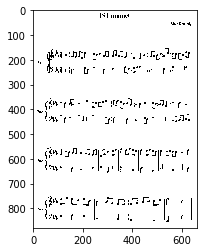

In [27]:
clear = EliminateLines(test)
f.show(clear)
saveimg(clear,"clean.png")

<b>Nota: Por la definicion de la imagen no se puede observar correctamente la imagen en cuestion, por lo cual se cargara aqui:<br>
![title](clean.png)

Una vez obtenido los valores, pasamos a separar los bloques:

In [29]:
result_1 = separator_blocks(clear,data)
saveimg(result_1[2],"demo2.png")

![title](demo2.png)<br>
Utilizando los datos encontrados, podemos pasar a separar la imagen otra vez, ya tenemos la funcion de separar en base a lineas horizontales blancas, por lo cual aprovecharemos una vez mas las facilidades de opencv para hacer una transposicion de matrices, voltendo la imagen:

In [36]:
def transpose_all(ar):
    for i in range(0,len(ar)):
        ar[i] = cv2.transpose(ar[i])
    
    return ar

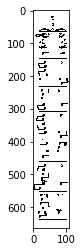

In [38]:
result_2 = transpose_all(result_1)
show(result_2[2])

Usaremos otra vez la funcion de separar bloques, pero ya que ahora nuestro <b>result_2</b> es un arreglo de imagenes, crearemos las funciones respectivas para poder separarlas de esta manera:

In [39]:
def ar_line_separator(ar,color):
    ans = []
    for i in range(0,len(ar)):
        ans.append(line_separator(ar[i],255))
    return ans
def ar_separator_blocks(ar,cords):
    ans = []
    for i in range(0,len(ar)):
        ans.append(separator_blocks(ar[i],cords[i]))
    
    return ans
def transponse_arr_all(ar):
    for i in range(0,len(ar)):
        ar[i]= transpose_all(ar[i])
    return ar


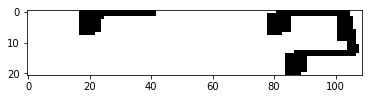

In [46]:
result_3 = ar_line_separator(result_2,255)
result_4 = ar_separator_blocks(result_2,result_3)
show(result_4[2][15]) #Se muestra un ejemplo

Una vez obtenida la informacion, se aplica la funcion de transposicion nuevamente, esta vez la version para arreglos, que permitira voltear la imagen a su forma original:

In [47]:
result_5 = transponse_arr_all(result_4)

Para terminar, existe un factor importante que se da en algunas situaciones, como se puede observar, alguna de las partituras vendran con doble linea, esto puede ser solucionado gracias a la funcion de separacion de lineas. Para facilitar el trabajo, se utiliza un for sencillo:

In [48]:
for i in range(0,len(result_5)):
    temp = ar_line_separator(result_5[i],255)
    result_5[i] = ar_separator_blocks(result_5[i],temp)

Todo este proceso dara como resultado un vector de tamaño [cantidad de bloques] [cantidad de notas] [cantidad de notas en la misma linea]

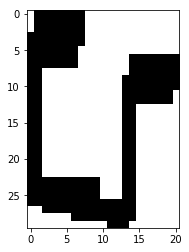

In [49]:
show(result_5[2][15][1])

Con esto se da por terminado el Hito 2 del trabajo de procesamiento de imagenes.<br><br><br>

Aun asi, se mostrara a continuacion una serie de intentos o soluciones alternativas para el proyecto:

# Soluciones alternativas

## Para separar:

Anteriormente, en el curso de procesamiento de imagenes, se creo un procedimiento de separacion de figuras efectivo, utilizando recursividad. El presente codigo puede ser encontrado en la direccion: 
https://github.com/GaEsRaRe/PDI/blob/master/Pregunta%202.ipynb
<br>
Parte del codigo es el siguiente:

In [50]:
def recorrer(mat,x,y,ar):
    go = False
    if(mat[x][y] == 0):
        go = True
        ar.append([x,y])
    mat[x][y] = 155
    if(go):
        recorrer(mat,x+1,y,ar)
        recorrer(mat,x,y-1,ar)
        recorrer(mat,x,y+1,ar)
        recorrer(mat,x-1,y,ar)
        recorrer(mat,x+1,y-1,ar)
        recorrer(mat,x+1,y+1,ar)
        recorrer(mat,x-1,y+1,ar)
        recorrer(mat,x-1,y-1,ar)
    return

## Para eliminar las lineas:

Tambien se creo el proceso de dilatado y erosionado desde Cero:

In [51]:
def Erosion(im,pixel,mascara):
    val = False
    for i in range(0,mascara.shape[0]):
        for j in range(0,mascara.shape[1]):
            if im[pixel[0]+i][pixel[1]+j]==mascara[i][j]:
                val = True
            else:
                val = False
                break
        if(val == False):
            break
    if(val == False):
        im[pixel[0]][pixel[1]] = 255

def Dilatacion(im,pixel,mascara):
    for i in range(0,mascara.shape[0]):
        for j in range(0,mascara.shape[1]):
            im[pixel[0]+i][pixel[1]+j]=mascara[i][j]

def BorrarLineas(img, mascara):
    im = np.copy(img)
    sx = int(im.shape[0])
    sy = int(im.shape[1])
    for i in range(0,sx):
        for j in range(0,sy):
            if(im[i][j]>=210):
                im[i][j] = 255
            else:
                im[i][j] = 0
    for i in range(0,im.shape[0]):
        for j in range(0,im.shape[1]):
            if(im[i][j]==0 and i+4<=im.shape[0] and j+4<=im.shape[1]):
                pixel = [i,j]
                Erosion(im,pixel,mascara)

    im2 = np.copy(im)
    for i in range(0,im.shape[0]):
        for j in range(0,im.shape[1]):
            if(im2[i][j]==0 and i+4<=im.shape[0] and j+4<=im.shape[1]):
                pixel = [i,j]
                Dilatacion(im,pixel,mascara)
    return im


Ambas opciones fueron descartadas por el costo de procesamiento de cada una, remplazadas por funciones mas simples o nativas de opencv

## Sobre el trabajo:

El presente trabajo se encuentra de manera libre en https://github.com/GaEsRaRe/PDIHito2
